In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from wordcloud import WordCloud

In [23]:
adult_data_path = "./data/adult.data"

columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
           "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
           "hours_per_week", "native_country", "income"]

adult_df = pd.read_csv(adult_data_path, names=columns)
adult_df = adult_df.apply(lambda x: x.str.strip()
                          if x.dtype == "object" else x)
# 将 ? 替换为 np.nan
adult_df = adult_df.replace("?", np.nan)
# 过滤掉为 np.nan 的数据
adult_df_filter = adult_df.dropna()


  1. 使用词云，展示职业（occupation）和收入（income）的关系。采用以上数据的可视化，可以直观地看到收入50K以上和以下各种职业的分布，从而能够快速的确定哪些职业为高收入人群，这样的人群一般更愿意且有能力支持投入学习中。
  备注：和之前的报告相比，将此项中的教育替换成了职业。

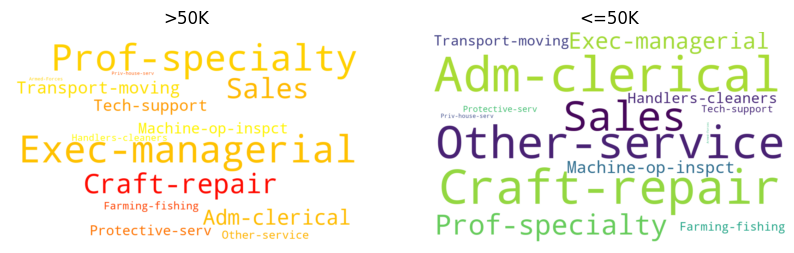

In [24]:
df0 = adult_df_filter[adult_df_filter['income']
                      == '>50K'].groupby('occupation').size().to_dict()
df1 = adult_df_filter[adult_df_filter['income']
                      == '<=50K'].groupby('occupation').size().to_dict()


wordcloud1 = WordCloud(background_color='white', width=1000, height=600, collocations=False,
                       colormap="autumn").generate_from_frequencies(df0)
wordcloud2 = WordCloud(background_color='white', width=1000, height=600, collocations=False,
                       colormap="viridis").generate_from_frequencies(df1)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(wordcloud1, interpolation='bilinear')
axes[0].set_title('>50K')
axes[0].axis('off')

axes[1].imshow(wordcloud2, interpolation='bilinear')
axes[1].set_title('<=50K')
axes[1].axis('off')

plt.show()


    2. 使用堆叠柱状图，展示sex,education,hours_ per week 之间的关系，采用以上几种数据类型，从而揭示2性不同学历和工作时间之间的关系，从而大致明确2性中各自什么样的学历人群具有较长的工作时间，什么样的学历人群具有较短的工作时间，从而便于设计针对性的教学内容，预期2性时间充裕的工作不一样。
     备注：和之前的报告相比，将此项中的职业替换成了教育。

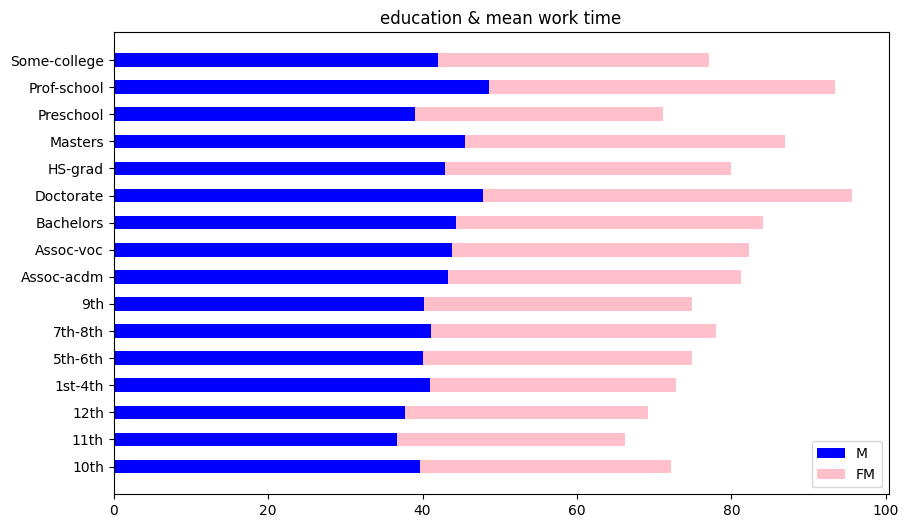

In [25]:
df0 = adult_df_filter[adult_df_filter["sex"]
                      == "Male"].groupby('education')['hours_per_week'].mean().to_dict()
df1 = adult_df_filter[adult_df_filter["sex"]
                      == "Female"].groupby('education')['hours_per_week'].mean().to_dict()
df2 = adult_df_filter.groupby('education').size().to_dict()
tmp = df1.keys() - df0.keys()
for k in tmp:
    df0[k] = 0
tmp = df2.keys() - df1.keys()
for k in tmp:
    df1[k] = 0
labels = list(df2.keys())
m = []
fm = []
for k in labels:
    m.append(df0[k])
    fm.append(df1[k])

width = 0.5
plt.figure(figsize=(10, 6))
plt.title('education & mean work time')
plt.barh(labels, m, width, color='b', label='M')
plt.barh(labels, fm, width, left=m, color='pink', label='FM')
plt.legend()
plt.show()


  3. 使用气泡图（一种变形的散点图），展示婚姻状况（marital_status），工作类型（workclass）,年龄（age）之间的关系。如图示，红色代表较为年轻的群体，蓝色为中间群体，绿色群体年龄较大，气泡的大小，代表这个群体数量，越大说明人数越多，越小人数越少，从而可以观测不同年龄段的人群所属的工作类型和婚姻状态。

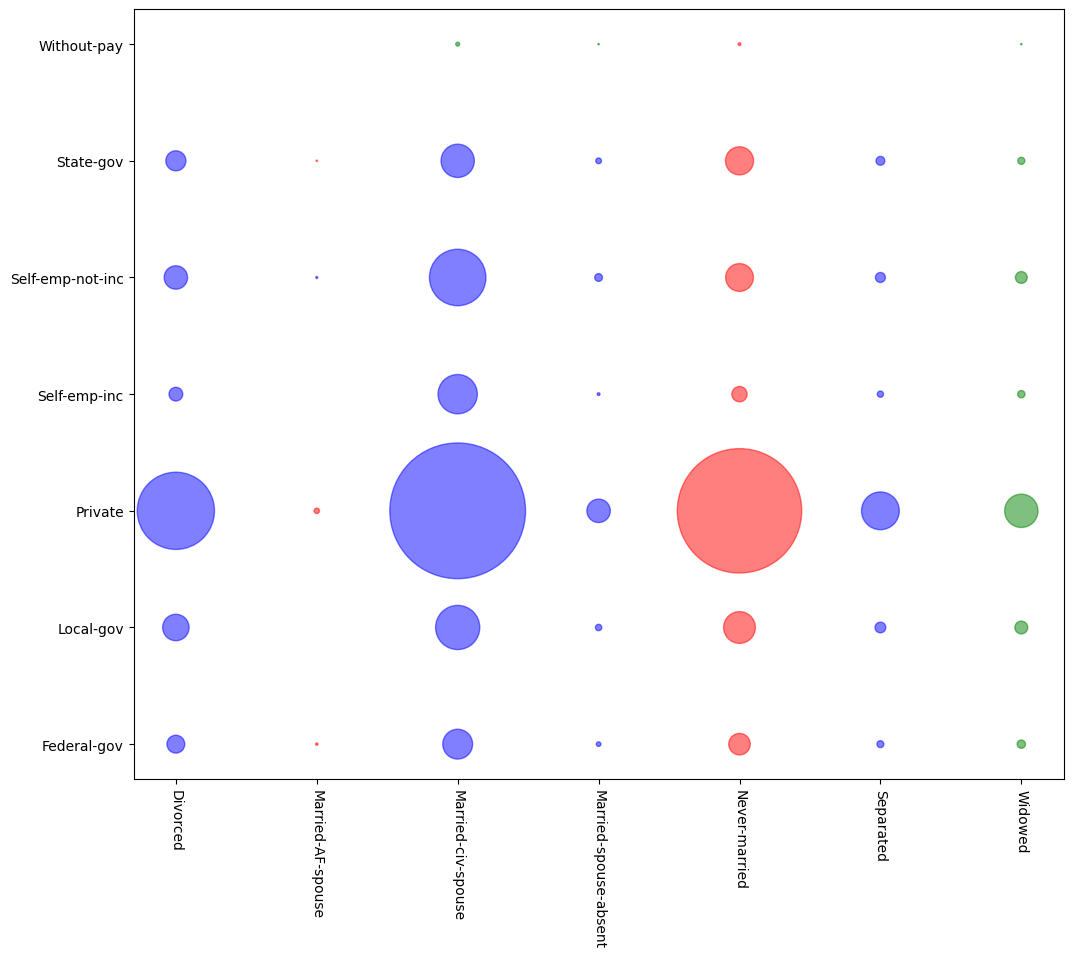

In [26]:
df = adult_df_filter.groupby(
    ["marital_status", "workclass"])['age'].mean().to_dict()
df1 = adult_df_filter.groupby(
    ["marital_status", "workclass"]).size().to_dict()
min_age = min(df.values())
delta_age = (max(df.values()) - min_age) / 3
# red:yong blue:middle green:old
color = {0: 'red', 1: 'blue', 2: 'green'}
x = []
y = []
s = []
c_lab = []
for k, v in df.items():
    x.append(k[0])
    y.append(k[1])
    s.append(df1[k])
    if v < delta_age+min_age:
        c_lab.append(0)
    elif v >= delta_age + min_age and v < min_age+delta_age * 2:
        c_lab.append(1)
    else:
        c_lab.append(2)

plt.figure(figsize=(12, 10))
plt.scatter(x, y, s=s, color=[color[i] for i in c_lab], alpha=0.5)
plt.xticks (rotation=270) 
# # # show the graph
plt.show()
